In [1]:
from data_loader import load_data
from early_model import stacked_lstm
from model_utils import model_pipeline,plot_history
import numpy as np

In [2]:
train_participant_num = ["C93D","C382D","C382N","C544D","C709N","C788N","P113D","P113N","P191D","P191N","P299D","P300D","P336D","P492D","P492N","P531N","P699D","P890N","P921D","P921N"]
valid_participant_num = ["C67D","C202D","C202N","C256D","C256N","P54D","P54N","P342D","P342N","P487D","P487N","P649N"]

In [3]:
X_train, y_train = load_data(train_participant_num, 'train', downsampling=True,angle_energy=False,augment=False)
X_valid, y_valid = load_data(valid_participant_num, 'validation')

In [4]:
print(X_train.shape,np.unique(y_train[:,0],return_counts=True),X_valid.shape,np.unique(y_valid[:,0],return_counts=True))

print(X_valid.shape,np.unique(y_valid[:,0],return_counts=True),X_valid.shape,np.unique(y_valid[:,0],return_counts=True))

(4286, 180, 70) (array([0., 1.], dtype=float32), array([ 844, 3442])) (2869, 180, 70) (array([0., 1.], dtype=float32), array([ 171, 2698]))
(2869, 180, 70) (array([0., 1.], dtype=float32), array([ 171, 2698])) (2869, 180, 70) (array([0., 1.], dtype=float32), array([ 171, 2698]))


/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Epoch 1: LearningRateScheduler setting learning rate to 0.004999999888241291.
Epoch 1/20


2023-03-20 20:10:36.052540: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 5s 432ms/step - loss: 0.2003 - binary_accuracy: 0.5134 - val_loss: 0.0942 - val_binary_accuracy: 0.9404 - lr: 0.0050

Epoch 2: LearningRateScheduler setting learning rate to 0.004999999888241291.
Epoch 2/20
9/9 [==============================] - 3s 375ms/step - loss: 0.1407 - binary_accuracy: 0.7961 - val_loss: 0.0835 - val_binary_accuracy: 0.9404 - lr: 0.0050

Epoch 3: LearningRateScheduler setting learning rate to 0.004999999888241291.
Epoch 3/20
9/9 [==============================] - 3s 388ms/step - loss: 0.1301 - binary_accuracy: 0.8021 - val_loss: 0.0862 - val_binary_accuracy: 0.9404 - lr: 0.0050

Epoch 4: LearningRateScheduler setting learning rate to 0.004999999888241291.
Epoch 4/20
9/9 [==============================] - 3s 380ms/step - loss: 0.1281 - binary_accuracy: 0.8003 - val_loss: 0.0852 - val_binary_accuracy: 0.9404 - lr: 0.0050

Epoch 5: LearningRateScheduler setting learning rate to 0.004999999888241291.
Epoch 5/20
9/9 [===========

/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


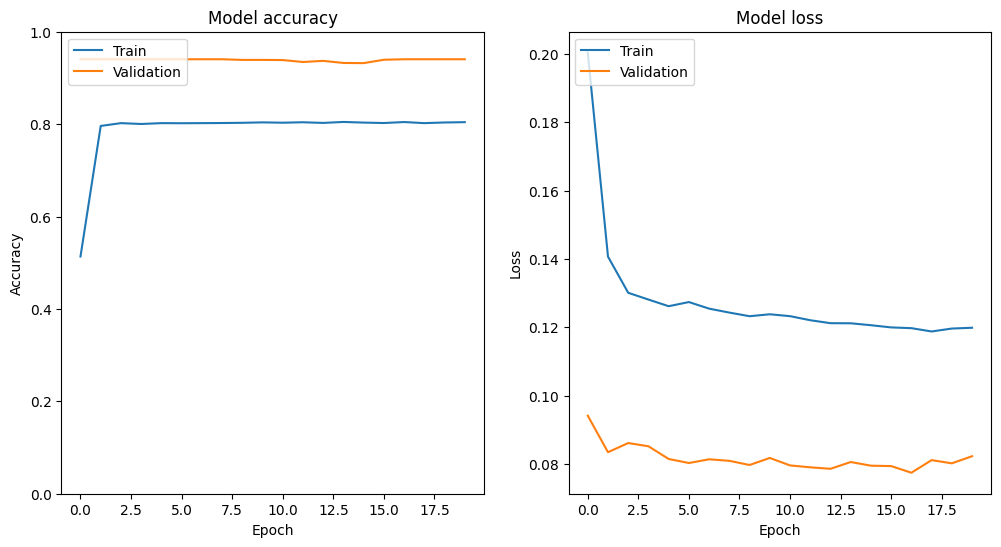

In [5]:
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = y_train.shape[1]
model = stacked_lstm(input_shape,num_classes)
y_pred, y_true, H = model_pipeline(model, X_train, y_train, X_valid, y_valid, epoch=20)
plot_history(H)